In [1]:
import pandas as pd

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
appearances = pd.read_csv('appearances.csv')
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


In [3]:
games = pd.read_csv('games.csv')

In [4]:
appearances.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')

In [5]:
appearances.isnull().sum()

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

In [6]:
appearances['competition_id'].unique()

array(['CLQ', 'ELQ', 'UKRS', 'RUP', 'UKR1', 'DK1', 'RUSS', 'RU1', 'BESC',
       'UKRP', 'BE1', 'FRCH', 'POCP', 'SC1', 'NLSC', 'CIT', 'FR1', 'NL1',
       'SCI', 'POSU', 'DFL', 'GBCS', 'DFB', 'TR1', 'PO1', 'GB1', 'ES1',
       'SUC', 'L1', 'GR1', 'IT1', 'CDR', 'DKP', 'USC', 'CL', 'EL', 'NLP',
       'SFA', 'GRP', 'FAC', 'KLUB', 'ECLQ', 'CGB'], dtype=object)

In [7]:
appearances = appearances[appearances['competition_id'] == 'GB1']

In [8]:
appearances = appearances.drop(['competition_id','player_current_club_id'],axis=1)
appearances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123609 entries, 6836 to 1555970
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   appearance_id   123609 non-null  object
 1   game_id         123609 non-null  int64 
 2   player_id       123609 non-null  int64 
 3   player_club_id  123609 non-null  int64 
 4   date            123609 non-null  object
 5   player_name     123609 non-null  object
 6   yellow_cards    123609 non-null  int64 
 7   red_cards       123609 non-null  int64 
 8   goals           123609 non-null  int64 
 9   assists         123609 non-null  int64 
 10  minutes_played  123609 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 11.3+ MB


In [9]:
club_games = pd.read_csv('club_games.csv')
club_games.isnull().sum()

game_id                      0
club_id                      0
own_goals                    0
own_position             39944
own_manager_name          1492
opponent_id                  0
opponent_goals               0
opponent_position        39944
opponent_manager_name     1492
hosting                      0
is_win                       0
dtype: int64

In [10]:
club_games_null = club_games[['own_position','own_manager_name','opponent_position','opponent_manager_name']]
club_games_null

,own_position,own_manager_name,opponent_position,opponent_manager_name
0,NaN,Holger Bachthaler,NaN,Armin Veh
1,NaN,Jürgen Luginger,NaN,Robin Dutt
2,NaN,Frank Schmidt,NaN,Alexander Schmidt
3,1.0,Jürgen Klopp,15.0,Torsten Lieberknecht
4,18.0,Torsten Lieberknecht,11.0,Armin Veh
...,...,...,...,...
134837,NaN,Imanol Alguacil,NaN,Quique Setién
134838,NaN,Quique Setién,NaN,Rubi
134839,NaN,Santiago Solari,NaN,Ernesto Valverde
134840,NaN,Aleksandr Gorshkov,NaN,Viktor Antikhovich


In [11]:
club_games_null.describe(include='all')

,own_position,own_manager_name,opponent_position,opponent_manager_name
count,94898.000000,133350,94898.000000,133350
unique,NaN,5660,NaN,5660
top,NaN,Diego Simeone,NaN,Diego Simeone
freq,NaN,639,NaN,639
mean,9.367531,NaN,9.367531,NaN
std,5.312438,NaN,5.312438,NaN
min,1.000000,NaN,1.000000,NaN
25%,5.000000,NaN,5.000000,NaN
50%,9.000000,NaN,9.000000,NaN
75%,14.000000,NaN,14.000000,NaN


In [12]:
clubs = pd.read_csv('clubs.csv')
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  426 non-null    int64  
 1   club_code                426 non-null    object 
 2   name                     426 non-null    object 
 3   domestic_competition_id  426 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               426 non-null    int64  
 6   average_age              388 non-null    float64
 7   foreigners_number        426 non-null    int64  
 8   foreigners_percentage    378 non-null    float64
 9   national_team_players    426 non-null    int64  
 10  stadium_name             426 non-null    object 
 11  stadium_seats            426 non-null    int64  
 12  net_transfer_record      426 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [13]:
clubs = clubs.drop(['total_market_value','coach_name'],axis=1)

In [14]:
clubs.isnull().sum()
# 426개 중에 38,48개

club_id                     0
club_code                   0
name                        0
domestic_competition_id     0
squad_size                  0
average_age                38
foreigners_number           0
foreigners_percentage      48
national_team_players       0
stadium_name                0
stadium_seats               0
net_transfer_record         0
last_season                 0
filename                    0
url                         0
dtype: int64

In [15]:
clubs_null = clubs[['average_age','foreigners_percentage']]
clubs_null

,average_age,foreigners_percentage
0,26.6,35.5
1,27.9,55.6
2,26.7,48.6
3,26.9,69.2
4,25.4,76.9
...,...,...
421,25.7,16.7
422,22.2,54.8
423,26.6,68.0
424,25.7,58.6


In [16]:
clubs_null.mode()

,average_age,foreigners_percentage
0,25.6,50.0


In [17]:
clubs_null.describe()

,average_age,foreigners_percentage
count,388.000000,378.000000
mean,25.503351,45.732011
std,1.556984,19.785702
min,18.300000,2.400000
25%,24.400000,30.850000
50%,25.600000,48.000000
75%,26.600000,59.250000
max,29.100000,100.000000


In [18]:
game_events = pd.read_csv('game_events.csv')
game_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725287 entries, 0 to 725286
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   game_event_id     725287 non-null  object 
 1   date              725287 non-null  object 
 2   game_id           725287 non-null  int64  
 3   minute            725287 non-null  int64  
 4   type              725287 non-null  object 
 5   club_id           725287 non-null  int64  
 6   player_id         725287 non-null  int64  
 7   description       405843 non-null  object 
 8   player_in_id      439642 non-null  float64
 9   player_assist_id  47030 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 55.3+ MB


In [19]:
game_events
# player_in_id : 교체해서 들어온 선수 id

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN
...,...,...,...,...,...,...,...,...,...,...
725282,c6a26553b1e1cdb5ceb73c45dcff22c4,2024-03-16,4300789,83,Goals,543,578391,", Right-footed shot, 1. Tournament Goal",NaN,NaN
725283,a8a6cc2489d696d2a92988c54e574cfd,2024-03-16,4300789,60,Substitutions,543,606718,", Tactical",171679.0,NaN
725284,6c01e56e2dcbbdadb697442b1027c594,2024-03-16,4300789,90,Substitutions,990,618903,", Tactical",403692.0,NaN
725285,57b6fa4f55459352e7a8d15cebf6b09d,2024-03-16,4300789,88,Goals,543,698678,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,578391.0


In [20]:
game_events.isnull().sum()

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         319444
player_in_id        285645
player_assist_id    678257
dtype: int64

In [21]:
game_events[['description','player_in_id','player_assist_id']]

,description,player_in_id,player_assist_id
0,"1. Yellow card , Mass confrontation",NaN,NaN
1,"1. Yellow card , Mass confrontation",NaN,NaN
2,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,", Not reported",49499.0,NaN
...,...,...,...
725282,", Right-footed shot, 1. Tournament Goal",NaN,NaN
725283,", Tactical",171679.0,NaN
725284,", Tactical",403692.0,NaN
725285,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,578391.0


In [22]:
game_lineups = pd.read_csv('game_lineups.csv')
game_lineups.isnull().sum()

game_lineups_id    0
date               0
game_id            0
player_id          0
club_id            0
player_name        0
type               0
position           3
number             0
team_captain       0
dtype: int64

In [23]:
game_lineups_null = game_lineups['position']

In [24]:
game_lineups_null.describe()

count         2145219
unique             17
top       Centre-Back
freq           370439
Name: position, dtype: object

In [25]:
games = pd.read_csv('games.csv')
games.isnull().sum()

game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position        19972
away_club_position        19972
home_club_manager_name      746
away_club_manager_name      746
stadium                     214
attendance                 9703
referee                     598
url                           0
home_club_formation        6598
away_club_formation        6452
home_club_name            11450
away_club_name            10212
aggregate                     0
competition_type              0
dtype: int64

In [26]:
games
# home_club_position : 당시 순위?

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67416,2629035,NLP,2015,Third Round,2015-10-27,383,16866,6,0,NaN,...,Philips Stadion,31000.0,Allard Lindhout,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-4-2,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,6:0,domestic_cup
67417,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Anthony Taylor,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Defending,4-5-1,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup
67418,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Michael Salisbury,https://www.transfermarkt.co.uk/spielbericht/i...,Starting Line-up: 4-2-3-1,Starting Line-up: 4-2-3-1,Stoke City,NaN,6:1,other
67419,3143618,FAC,2018,Third Round Replay,2019-01-15,512,3054,2,3,NaN,...,bet365 Stadium,10261.0,Geoff Eltringham,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 Diamond,4-2-3-1,Stoke City,NaN,2:3,domestic_cup


In [27]:
player_valuations = pd.read_csv('player_valuations.csv')
player_valuations.isnull().sum()

player_id                              0
date                                   0
market_value_in_eur                    0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64

In [28]:
players = pd.read_csv('players.csv')
players.isnull().sum()

player_id                                   0
first_name                               1987
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2720
city_of_birth                            2197
country_of_citizenship                    579
date_of_birth                              45
sub_position                              174
position                                    0
foot                                     2365
height_in_cm                             2047
contract_expiration_date                11436
agent_name                              15371
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur               

# **테이블 merge**

In [29]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67421 entries, 0 to 67420
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 67421 non-null  int64  
 1   competition_id          67421 non-null  object 
 2   season                  67421 non-null  int64  
 3   round                   67421 non-null  object 
 4   date                    67421 non-null  object 
 5   home_club_id            67421 non-null  int64  
 6   away_club_id            67421 non-null  int64  
 7   home_club_goals         67421 non-null  int64  
 8   away_club_goals         67421 non-null  int64  
 9   home_club_position      47449 non-null  float64
 10  away_club_position      47449 non-null  float64
 11  home_club_manager_name  66675 non-null  object 
 12  away_club_manager_name  66675 non-null  object 
 13  stadium                 67207 non-null  object 
 14  attendance              57718 non-null

In [30]:
game_lineups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145222 entries, 0 to 2145221
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   game_lineups_id  object
 1   date             object
 2   game_id          int64 
 3   player_id        int64 
 4   club_id          int64 
 5   player_name      object
 6   type             object
 7   position         object
 8   number           object
 9   team_captain     int64 
dtypes: int64(4), object(6)
memory usage: 163.7+ MB


In [31]:
games = games[games['competition_id'] == 'GB1']

In [32]:
games['date'] = pd.to_datetime(games['date'])


games = games[(games['date'] >= '2018-08-01') & (games['date'] <= '2024-12-31')]


games

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_6762/3400158658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['date'] = pd.to_datetime(games['date'])


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
1876,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,John Smith's Stadium,24121.0,Chris Kavanagh,https://www.transfermarkt.co.uk/huddersfield-t...,3-5-2 flat,4-3-3 Attacking,Huddersfield Town,Chelsea Football Club,0:3,domestic_league
1877,3050215,GB1,2018,5. Matchday,2018-09-15,1010,985,1,2,4.0,...,Vicarage Road,20537.0,Mike Dean,https://www.transfermarkt.co.uk/watford-fc_man...,4-4-2,4-2-3-1,Watford FC,Manchester United Football Club,1:2,domestic_league
1878,3050250,GB1,2018,9. Matchday,2018-10-20,631,985,2,2,3.0,...,Stamford Bridge,40721.0,Mike Dean,https://www.transfermarkt.co.uk/chelsea-fc_man...,4-3-3 Attacking,4-3-3 Attacking,Chelsea Football Club,Manchester United Football Club,2:2,domestic_league
1879,3050264,GB1,2018,10. Matchday,2018-10-27,180,762,0,0,16.0,...,St Mary's Stadium,30736.0,Chris Kavanagh,https://www.transfermarkt.co.uk/southampton-fc...,4-4-2 double 6,4-4-2 double 6,Southampton FC,Newcastle United Football Club,0:0,domestic_league
1880,3050336,GB1,2018,17. Matchday,2018-12-15,543,989,2,0,7.0,...,Molineux Stadium,30997.0,Simon Hooper,https://www.transfermarkt.co.uk/wolverhampton-...,3-5-2,3-4-2-1,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth,2:0,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66901,3050278,GB1,2018,12. Matchday,2018-11-10,603,1237,2,1,18.0,...,Cardiff City Stadium,29402.0,Martin Atkinson,https://www.transfermarkt.co.uk/cardiff-city_b...,4-3-3 Attacking,4-2-3-1,Cardiff City,Brighton and Hove Albion Football Club,2:1,domestic_league
66913,3421741,GB1,2020,7. Matchday,2020-11-01,148,1237,2,1,3.0,...,Tottenham Hotspur Stadium,NaN,Graham Scott,https://www.transfermarkt.co.uk/tottenham-hots...,4-2-3-1,3-5-2 flat,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club,2:1,domestic_league
66914,3429714,GB1,2020,23. Matchday,2021-02-06,1132,1237,1,1,17.0,...,Turf Moor,NaN,Anthony Taylor,https://www.transfermarkt.co.uk/burnley-fc_bri...,4-4-2 double 6,5-3-2,Burnley Football Club,Brighton and Hove Albion Football Club,1:1,domestic_league
67152,3429694,GB1,2020,21. Matchday,2021-01-31,1237,148,1,0,17.0,...,AMEX Stadium,NaN,Peter Bankes,https://www.transfermarkt.co.uk/brighton-amp-h...,3-4-2-1,3-4-2-1,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club,1:0,domestic_league


In [33]:
Games = pd.merge(games,game_lineups, on='game_id')
Games

,game_id,competition_id,season,round,date_x,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,competition_type,game_lineups_id,date_y,player_id,club_id,player_name,type,position,number,team_captain
0,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,domestic_league,feaa0c082897860760c48e6b33dfcf8f,2018-08-11,19948,631,Willy Caballero,substitutes,Goalkeeper,13,0
1,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,domestic_league,dda710b3fb46b3c87504a60db64a3c12,2018-08-11,46741,631,David Luiz,starting_lineup,Centre-Back,30,0
2,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,domestic_league,7805835001f858685f7914461f2cee92,2018-08-11,48870,1110,Jonas Lössl,substitutes,Goalkeeper,1,0
3,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,domestic_league,2ba6398c4c47554f8678a279a07364f1,2018-08-11,50202,631,Eden Hazard,substitutes,Left Winger,10,0
4,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,domestic_league,28029971bad05742efe13bc4f3d1519b,2018-08-11,52059,1110,Zanka,starting_lineup,Centre-Back,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72698,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,domestic_league,f2246b76e7e638f5f65d958bf95a39ff,2022-05-15,670883,148,Dane Scarlett,substitutes,Centre-Forward,44,0
72699,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,domestic_league,2f96e24b5295df5f59807feec5f669e9,2022-05-15,677311,1132,Anthony Mancini,substitutes,Central Midfield,35,0
72700,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,domestic_league,a353e678280e1822f742e9604b17e8e7,2022-05-15,686839,1132,Owen Dodgson,substitutes,Left-Back,39,0
72701,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,domestic_league,8457ccdf72b84f80ec7e0b530cd01615,2022-05-15,704801,1132,Joe McGlynn,substitutes,Centre-Forward,49,0


In [34]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72703 entries, 0 to 72702
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 72703 non-null  int64         
 1   competition_id          72703 non-null  object        
 2   season                  72703 non-null  int64         
 3   round                   72703 non-null  object        
 4   date_x                  72703 non-null  datetime64[ns]
 5   home_club_id            72703 non-null  int64         
 6   away_club_id            72703 non-null  int64         
 7   home_club_goals         72703 non-null  int64         
 8   away_club_goals         72703 non-null  int64         
 9   home_club_position      72703 non-null  float64       
 10  away_club_position      72703 non-null  float64       
 11  home_club_manager_name  72703 non-null  object        
 12  away_club_manager_name  72703 non-null  object

In [35]:
Games['team_captain'].unique()

array([0, 1])

In [36]:
Games = Games.drop(['url','competition_type'],axis=1)
Games

,game_id,competition_id,season,round,date_x,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,aggregate,game_lineups_id,date_y,player_id,club_id,player_name,type,position,number,team_captain
0,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,0:3,feaa0c082897860760c48e6b33dfcf8f,2018-08-11,19948,631,Willy Caballero,substitutes,Goalkeeper,13,0
1,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,0:3,dda710b3fb46b3c87504a60db64a3c12,2018-08-11,46741,631,David Luiz,starting_lineup,Centre-Back,30,0
2,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,0:3,7805835001f858685f7914461f2cee92,2018-08-11,48870,1110,Jonas Lössl,substitutes,Goalkeeper,1,0
3,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,0:3,2ba6398c4c47554f8678a279a07364f1,2018-08-11,50202,631,Eden Hazard,substitutes,Left Winger,10,0
4,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,0:3,28029971bad05742efe13bc4f3d1519b,2018-08-11,52059,1110,Zanka,starting_lineup,Centre-Back,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72698,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,1:0,f2246b76e7e638f5f65d958bf95a39ff,2022-05-15,670883,148,Dane Scarlett,substitutes,Centre-Forward,44,0
72699,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,1:0,2f96e24b5295df5f59807feec5f669e9,2022-05-15,677311,1132,Anthony Mancini,substitutes,Central Midfield,35,0
72700,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,1:0,a353e678280e1822f742e9604b17e8e7,2022-05-15,686839,1132,Owen Dodgson,substitutes,Left-Back,39,0
72701,3592240,GB1,2021,37. Matchday,2022-05-15,148,1132,1,0,4.0,...,1:0,8457ccdf72b84f80ec7e0b530cd01615,2022-05-15,704801,1132,Joe McGlynn,substitutes,Centre-Forward,49,0


In [37]:
clubs

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,27,27.9,15,55.6,6,Yekaterinburg Arena,23000,€-895k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,26.7,17,48.6,13,Tüpraş Stadyumu,42590,€-26.00m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,31,22.2,17,54.8,4,Kras Stadion,7384,+€2.30m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,25,26.6,17,68.0,16,Gewiss Stadium,21747,+€73.82m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,29,25.7,17,58.6,3,Estádio C. J. de Almeida Freitas,6153,€-2.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [38]:
clubs = clubs[clubs['domestic_competition_id'] == 'GB1']
clubs

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
23,603,cardiff-city,Cardiff City,GB1,28,25.5,24,85.7,8,Cardiff City Stadium,33280,€-655k,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/cardiff-city/s...
30,989,afc-bournemouth,Association Football Club Bournemouth,GB1,26,25.8,17,65.4,12,Vitality Stadium,11329,€-125.79m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/afc-bournemout...
42,3008,hull-city,Hull City,GB1,28,25.0,17,60.7,6,MKM Stadium,25586,+€7.50m,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/hull-city/star...
43,31,fc-liverpool,Liverpool Football Club,GB1,28,25.6,21,75.0,18,Anfield,54074,€-111.30m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...
59,1010,fc-watford,Watford FC,GB1,30,26.3,24,80.0,12,Vicarage Road,21577,+€42.02m,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/fc-watford/sta...
85,1003,leicester-city,Leicester City,GB1,25,27.1,14,56.0,11,King Power Stadium,32273,+€26.00m,2022,../data/raw/transfermarkt-scraper/2022/clubs.j...,https://www.transfermarkt.co.uk/leicester-city...
86,1237,brighton-amp-hove-albion,Brighton and Hove Albion Football Club,GB1,27,25.5,19,70.4,16,AMEX Stadium,31800,+€86.40m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/brighton-amp-h...
135,703,nottingham-forest,Nottingham Forest Football Club,GB1,28,26.9,24,85.7,16,The City Ground,30445,€-48.23m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/nottingham-for...
138,1031,luton-town,Luton Town Football Club,GB1,28,27.5,16,57.1,10,Kenilworth Road,11050,€-25.62m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/luton-town/sta...


In [39]:
clubs = clubs.drop(['filename','url'],axis=1)

In [40]:
club_games

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
134837,3142950,681,0,NaN,Imanol Alguacil,150,0,NaN,Quique Setién,Away,0
134838,3148382,150,1,NaN,Quique Setién,714,1,NaN,Rubi,Away,0
134839,3153158,418,1,NaN,Santiago Solari,131,1,NaN,Ernesto Valverde,Away,0
134840,3307741,36661,1,NaN,Aleksandr Gorshkov,32218,2,NaN,Viktor Antikhovich,Away,0


In [41]:
Clubs = pd.merge(clubs,club_games,on='club_id')
Clubs

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,...,game_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,...,2578253,1,2.0,Mauricio Pochettino,984,1,13.0,Tony Pulis,Home,0
1,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,...,2872453,1,4.0,Mauricio Pochettino,281,3,1.0,Pep Guardiola,Home,0
2,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,...,2486657,0,7.0,Mauricio Pochettino,985,0,3.0,Louis van Gaal,Home,0
3,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,...,2578102,0,4.0,Mauricio Pochettino,1003,1,2.0,Claudio Ranieri,Home,0
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,...,2301908,2,NaN,André Villas-Boas,26,2,NaN,Murat Yakin,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11104,984,west-bromwich-albion,West Bromwich Albion,GB1,25,27.8,8,32.0,4,The Hawthorns,...,3421711,0,17.0,Slaven Bilic,180,2,12.0,Ralph Hasenhüttl,Away,0
11105,984,west-bromwich-albion,West Bromwich Albion,GB1,25,27.8,8,32.0,4,The Hawthorns,...,3429736,0,19.0,Sam Allardyce,1132,0,15.0,Sean Dyche,Away,0
11106,984,west-bromwich-albion,West Bromwich Albion,GB1,25,27.8,8,32.0,4,The Hawthorns,...,3429866,1,19.0,Sam Allardyce,399,3,9.0,Marcelo Bielsa,Away,0
11107,984,west-bromwich-albion,West Bromwich Albion,GB1,25,27.8,8,32.0,4,The Hawthorns,...,4013650,0,NaN,Carlos Corberán,698,3,NaN,Nigel Pearson,Away,0


In [42]:
Clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  11109 non-null  int64  
 1   club_code                11109 non-null  object 
 2   name                     11109 non-null  object 
 3   domestic_competition_id  11109 non-null  object 
 4   squad_size               11109 non-null  int64  
 5   average_age              11109 non-null  float64
 6   foreigners_number        11109 non-null  int64  
 7   foreigners_percentage    11109 non-null  float64
 8   national_team_players    11109 non-null  int64  
 9   stadium_name             11109 non-null  object 
 10  stadium_seats            11109 non-null  int64  
 11  net_transfer_record      11109 non-null  object 
 12  last_season              11109 non-null  int64  
 13  game_id                  11109 non-null  int64  
 14  own_goals             

In [43]:
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
6836,2230140_11680,2230140,11680,1039,2012-08-18,Rob Green,0,0,0,0,90
6837,2230140_13583,2230140,13583,1039,2012-08-18,Clint Hill,0,0,0,0,64
6838,2230140_136589,2230140,136589,1039,2012-08-18,Samba Diakité,1,0,0,0,86
6839,2230140_14007,2230140,14007,1039,2012-08-18,Shaun Derry,0,0,0,0,4
6840,2230140_14031,2230140,14031,1039,2012-08-18,Andy Johnson,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,0,0,0,0,45


In [44]:
appearances['date'] = pd.to_datetime(appearances['date'])


appearances = appearances[(appearances['date'] >= '2018-08-01') & (appearances['date'] <= '2024-12-31')]
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,0,0,0,0,45


In [45]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61403 entries, 785591 to 1555970
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   appearance_id   61403 non-null  object        
 1   game_id         61403 non-null  int64         
 2   player_id       61403 non-null  int64         
 3   player_club_id  61403 non-null  int64         
 4   date            61403 non-null  datetime64[ns]
 5   player_name     61403 non-null  object        
 6   yellow_cards    61403 non-null  int64         
 7   red_cards       61403 non-null  int64         
 8   goals           61403 non-null  int64         
 9   assists         61403 non-null  int64         
 10  minutes_played  61403 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 5.6+ MB


In [46]:
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30494,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0
30495,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,right,183.0,2026-06-30 00:00:00,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0
30496,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30497,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,NaN,2026-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,NaN,NaN


In [47]:
players = players[players['current_club_domestic_competition_id'] == 'GB1']
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,...,both,179.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
20,488,Gerhard,Tremmel,Gerhard Tremmel,2016,2288,gerhard-tremmel,Germany,München,Germany,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/gerhard-tremme...,GB1,Swansea City,250000.0,2200000.0
63,1397,Michael,Owen,Michael Owen,2012,512,michael-owen,England,Chester,England,...,both,173.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/michael-owen/p...,GB1,Stoke City,1000000.0,30000000.0
75,1573,Thomas,Hitzlsperger,Thomas Hitzlsperger,2012,29,thomas-hitzlsperger,Germany,München,Germany,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/thomas-hitzlsp...,GB1,Everton Football Club,1000000.0,9000000.0
113,2514,Bastian,Schweinsteiger,Bastian Schweinsteiger,2016,985,bastian-schweinsteiger,Germany,Kolbermoor,Germany,...,NaN,NaN,NaN,BS Family Office,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bastian-schwei...,GB1,Manchester United Football Club,1000000.0,40000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,1005649,NaN,Murillo,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,...,left,184.0,2028-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/murillo/profil...,GB1,Nottingham Forest Football Club,25000000.0,25000000.0
30232,1031256,Callum,McFarlane,Callum McFarlane,2022,931,callum-mcfarlane,NaN,NaN,England,...,NaN,185.0,NaN,Midas Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/callum-mcfarla...,GB1,Fulham Football Club,NaN,NaN
30315,1060740,Enso,González,Enso González,2023,543,enso-gonzalez,Paraguay,Asunción,Paraguay,...,left,169.0,2029-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/enso-gonzalez/...,GB1,Wolverhampton Wanderers Football Club,4000000.0,4000000.0
30371,1082850,NaN,Deivid Washington,Deivid Washington,2023,631,deivid-washington,Brazil,Itumbiara,Brazil,...,right,187.0,2030-06-30 00:00:00,Bertolucci Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/deivid-washing...,GB1,Chelsea Football Club,9000000.0,9000000.0


In [48]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 7 to 30445
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             2058 non-null   int64  
 1   first_name                            1988 non-null   object 
 2   last_name                             2058 non-null   object 
 3   name                                  2058 non-null   object 
 4   last_season                           2058 non-null   int64  
 5   current_club_id                       2058 non-null   int64  
 6   player_code                           2058 non-null   object 
 7   country_of_birth                      1909 non-null   object 
 8   city_of_birth                         1953 non-null   object 
 9   country_of_citizenship                2006 non-null   object 
 10  date_of_birth                         2058 non-null   object 
 11  sub_position         

In [49]:
players = players.drop(['first_name','last_name','image_url','url','market_value_in_eur','highest_market_value_in_eur'],axis=1)
players

,player_id,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name
7,132,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,1980-10-04,Attacking Midfield,Midfield,both,179.0,NaN,NaN,GB1,Arsenal Football Club
20,488,Gerhard Tremmel,2016,2288,gerhard-tremmel,Germany,München,Germany,1978-11-16,Goalkeeper,Goalkeeper,NaN,NaN,NaN,NaN,GB1,Swansea City
63,1397,Michael Owen,2012,512,michael-owen,England,Chester,England,1979-12-14,Centre-Forward,Attack,both,173.0,NaN,NaN,GB1,Stoke City
75,1573,Thomas Hitzlsperger,2012,29,thomas-hitzlsperger,Germany,München,Germany,1982-04-05,Central Midfield,Midfield,NaN,NaN,NaN,NaN,GB1,Everton Football Club
113,2514,Bastian Schweinsteiger,2016,985,bastian-schweinsteiger,Germany,Kolbermoor,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,NaN,BS Family Office,GB1,Manchester United Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,2028-06-30 00:00:00,NaN,GB1,Nottingham Forest Football Club
30232,1031256,Callum McFarlane,2022,931,callum-mcfarlane,NaN,NaN,England,2003-09-08,Centre-Forward,Attack,NaN,185.0,NaN,Midas Sports,GB1,Fulham Football Club
30315,1060740,Enso González,2023,543,enso-gonzalez,Paraguay,Asunción,Paraguay,2005-01-20,Left Winger,Attack,left,169.0,2029-06-30 00:00:00,NaN,GB1,Wolverhampton Wanderers Football Club
30371,1082850,Deivid Washington,2023,631,deivid-washington,Brazil,Itumbiara,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,2030-06-30 00:00:00,Bertolucci Sports,GB1,Chelsea Football Club


In [50]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 7 to 30445
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             2058 non-null   int64  
 1   name                                  2058 non-null   object 
 2   last_season                           2058 non-null   int64  
 3   current_club_id                       2058 non-null   int64  
 4   player_code                           2058 non-null   object 
 5   country_of_birth                      1909 non-null   object 
 6   city_of_birth                         1953 non-null   object 
 7   country_of_citizenship                2006 non-null   object 
 8   date_of_birth                         2058 non-null   object 
 9   sub_position                          2054 non-null   object 
 10  position                              2058 non-null   object 
 11  foot                 

In [51]:
player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
466897,937958,2024-03-21,75000000,131,ES1
466898,938158,2024-03-21,7500000,131,ES1
466899,941869,2024-03-21,500000,3709,ES1
466900,962110,2024-03-21,25000000,131,ES1


In [52]:
player_valuations = player_valuations[player_valuations['player_club_domestic_competition_id'] == 'GB1']
player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
3,6893,2003-12-15,900000,984,GB1
11,132,2004-10-04,13000000,11,GB1
23,488,2004-10-04,1000000,2288,GB1
66,1397,2004-10-04,30000000,512,GB1
78,1573,2004-10-04,4500000,29,GB1
...,...,...,...,...,...
465702,867688,2024-03-14,16000000,1237,GB1
465703,922769,2024-03-14,22000000,762,GB1
465704,983989,2024-03-14,18000000,1237,GB1
465705,1005649,2024-03-14,25000000,703,GB1


In [53]:
player_valuations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31246 entries, 3 to 465706
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   player_id                            31246 non-null  int64 
 1   date                                 31246 non-null  object
 2   market_value_in_eur                  31246 non-null  int64 
 3   current_club_id                      31246 non-null  int64 
 4   player_club_domestic_competition_id  31246 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [54]:
player_valuations = player_valuations[(player_valuations['date'] >= '2018-08-01') & (player_valuations['date'] <= '2024-12-31')]

In [55]:
player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
245507,486477,2018-08-01,350000,1010,GB1
245531,346499,2018-08-02,175000,1123,GB1
245563,309180,2018-08-03,750000,1237,GB1
245569,345961,2018-08-03,250000,379,GB1
245944,404842,2018-08-06,500000,29,GB1
...,...,...,...,...,...
465702,867688,2024-03-14,16000000,1237,GB1
465703,922769,2024-03-14,22000000,762,GB1
465704,983989,2024-03-14,18000000,1237,GB1
465705,1005649,2024-03-14,25000000,703,GB1


In [56]:
players_2 = pd.merge(players,appearances,on='player_id')
players_2

,player_id,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,...,appearance_id,game_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050171_3333,3050171,31,2018-08-12,James Milner,0,0,0,1,90
1,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050181_3333,3050181,31,2018-08-20,James Milner,0,0,1,0,67
2,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050191_3333,3050191,31,2018-08-25,James Milner,0,0,0,0,90
3,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050203_3333,3050203,31,2018-09-01,James Milner,1,0,0,1,90
4,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,3050214_3333,3050214,31,2018-09-15,James Milner,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47775,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095332_1005649,4095332,703,2024-02-24,Murillo,1,0,0,0,45
47776,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095347_1005649,4095347,703,2024-03-02,Murillo,0,0,0,0,90
47777,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095353_1005649,4095353,703,2024-03-10,Murillo,0,0,0,0,90
47778,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,4095366_1005649,4095366,703,2024-03-16,Murillo,0,0,0,0,90


In [57]:
Players = pd.merge(players_2,player_valuations,on='player_id')
Players

,player_id,name,last_season,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,...,player_name,yellow_cards,red_cards,goals,assists,minutes_played,date_y,market_value_in_eur,current_club_id_y,player_club_domestic_competition_id
0,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,James Milner,0,0,0,1,90,2018-12-19,15000000,1237,GB1
1,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,James Milner,0,0,0,1,90,2019-06-13,15000000,1237,GB1
2,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,James Milner,0,0,0,1,90,2019-12-10,12000000,1237,GB1
3,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,James Milner,0,0,0,1,90,2020-03-09,8000000,1237,GB1
4,3333,James Milner,2023,1237,james-milner,England,Leeds,England,1986-01-04,Central Midfield,...,James Milner,0,0,0,1,90,2020-04-08,6500000,1237,GB1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673188,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,Murillo,0,0,0,0,90,2023-12-19,22000000,703,GB1
673189,1005649,Murillo,2023,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,...,Murillo,0,0,0,0,90,2024-03-14,25000000,703,GB1
673190,1082850,Deivid Washington,2023,631,deivid-washington,Brazil,Itumbiara,Brazil,2005-06-05,Centre-Forward,...,Deivid Washington,0,0,0,0,9,2023-07-25,4000000,631,GB1
673191,1082850,Deivid Washington,2023,631,deivid-washington,Brazil,Itumbiara,Brazil,2005-06-05,Centre-Forward,...,Deivid Washington,0,0,0,0,9,2023-10-09,9000000,631,GB1


In [58]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673193 entries, 0 to 673192
Data columns (total 31 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   player_id                             673193 non-null  int64         
 1   name                                  673193 non-null  object        
 2   last_season                           673193 non-null  int64         
 3   current_club_id_x                     673193 non-null  int64         
 4   player_code                           673193 non-null  object        
 5   country_of_birth                      659093 non-null  object        
 6   city_of_birth                         673024 non-null  object        
 7   country_of_citizenship                659261 non-null  object        
 8   date_of_birth                         673193 non-null  object        
 9   sub_position                          673193 non-null  obje

In [59]:
Clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  11109 non-null  int64  
 1   club_code                11109 non-null  object 
 2   name                     11109 non-null  object 
 3   domestic_competition_id  11109 non-null  object 
 4   squad_size               11109 non-null  int64  
 5   average_age              11109 non-null  float64
 6   foreigners_number        11109 non-null  int64  
 7   foreigners_percentage    11109 non-null  float64
 8   national_team_players    11109 non-null  int64  
 9   stadium_name             11109 non-null  object 
 10  stadium_seats            11109 non-null  int64  
 11  net_transfer_record      11109 non-null  object 
 12  last_season              11109 non-null  int64  
 13  game_id                  11109 non-null  int64  
 14  own_goals             

In [60]:
Games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72703 entries, 0 to 72702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 72703 non-null  int64         
 1   competition_id          72703 non-null  object        
 2   season                  72703 non-null  int64         
 3   round                   72703 non-null  object        
 4   date_x                  72703 non-null  datetime64[ns]
 5   home_club_id            72703 non-null  int64         
 6   away_club_id            72703 non-null  int64         
 7   home_club_goals         72703 non-null  int64         
 8   away_club_goals         72703 non-null  int64         
 9   home_club_position      72703 non-null  float64       
 10  away_club_position      72703 non-null  float64       
 11  home_club_manager_name  72703 non-null  object        
 12  away_club_manager_name  72703 non-null  object

In [73]:
numeric_columns = Games.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns

['game_id',
 'season',
 'home_club_id',
 'away_club_id',
 'home_club_goals',
 'away_club_goals',
 'home_club_position',
 'away_club_position',
 'attendance',
 'player_id',
 'club_id',
 'team_captain']

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

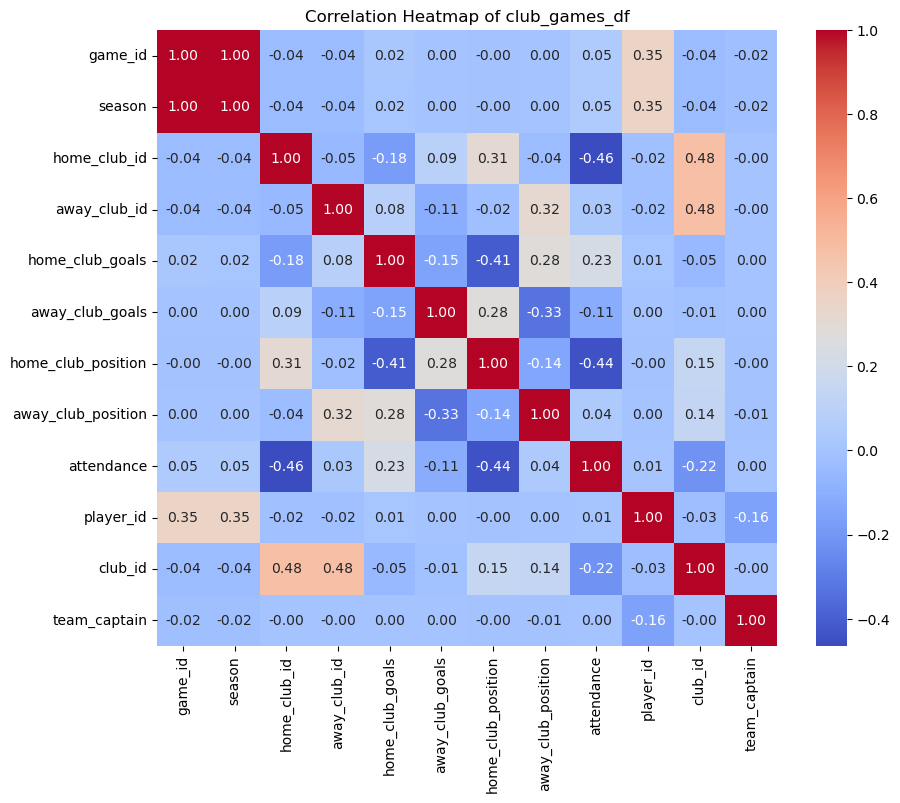

In [78]:
correlation_matrix = Games[numeric_columns].corr()

# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of club_games_df')
plt.show()